In [ ]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [ ]:
# Read dataset to pandas dataframe
dataset = pd.read_csv("/content/drive/MyDrive/iris_dataset.csv", names=names)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
print(X.head())

   sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5).fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)

In [ ]:
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in ytest:
    print ('%-25s %-25s' % (label, ypred[i]), end="")
    if (label == ypred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(ytest, ypred))
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(ytest, ypred))
print ("-------------------------------------------------------------------------")
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(ytest,ypred))
print ("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
Iris-versicolor           Iris-versicolor           Correct                  
Iris-setosa               Iris-setosa               Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-setosa               Iris-setosa               Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-setosa               Iris-setosa               Correct                  
Iris-setosa               Iris-setosa               Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-virginica            Iris-virginica            Correct            

In [ ]:
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in ytest:
    print ('%-25s %-25s' % (label, ypred[i]), end="")
    if (label == ypred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1



-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
Iris-virginica            Iris-virginica            Correct                  
Iris-virginica            Iris-virginica            Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-setosa               Iris-setosa               Correct                  
Iris-virginica            Iris-virginica            Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-virginica            Iris-virginica            Correct                  
Iris-setosa               Iris-setosa               Correct            

In [ ]:
print("\nConfusion Matrix:\n",metrics.confusion_matrix(ytest, ypred))


Confusion Matrix:
 [[4 0 0]
 [0 5 0]
 [0 0 6]]


In [ ]:
print("\nClassification Report:\n",metrics.classification_report(ytest, ypred))


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(ytest,ypred))

Accuracy of the classifer is 1.00


**OTHER METHOD**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.groupby('Species').size()

,0
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
#for dat visulaiztion
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

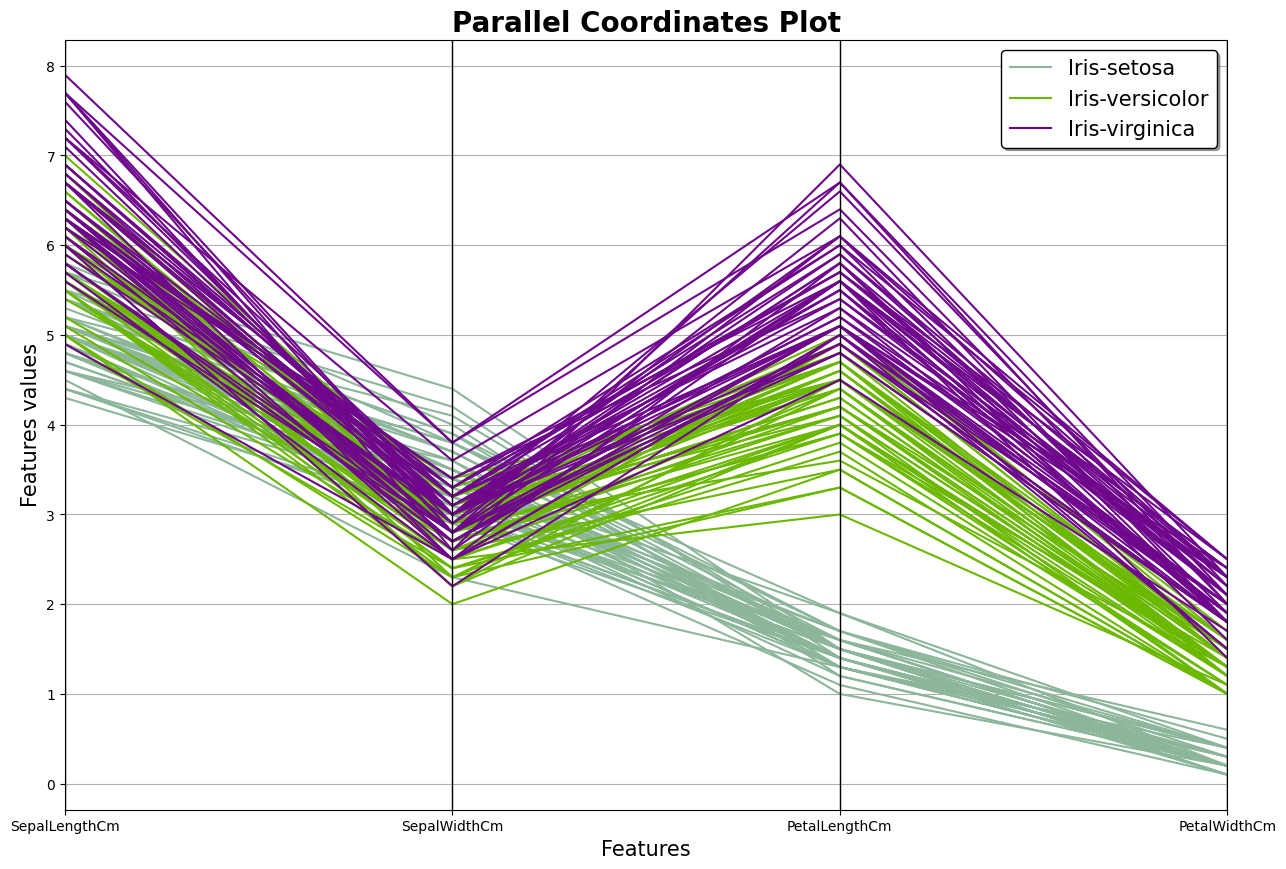

In [ ]:
#parallel coordinates
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


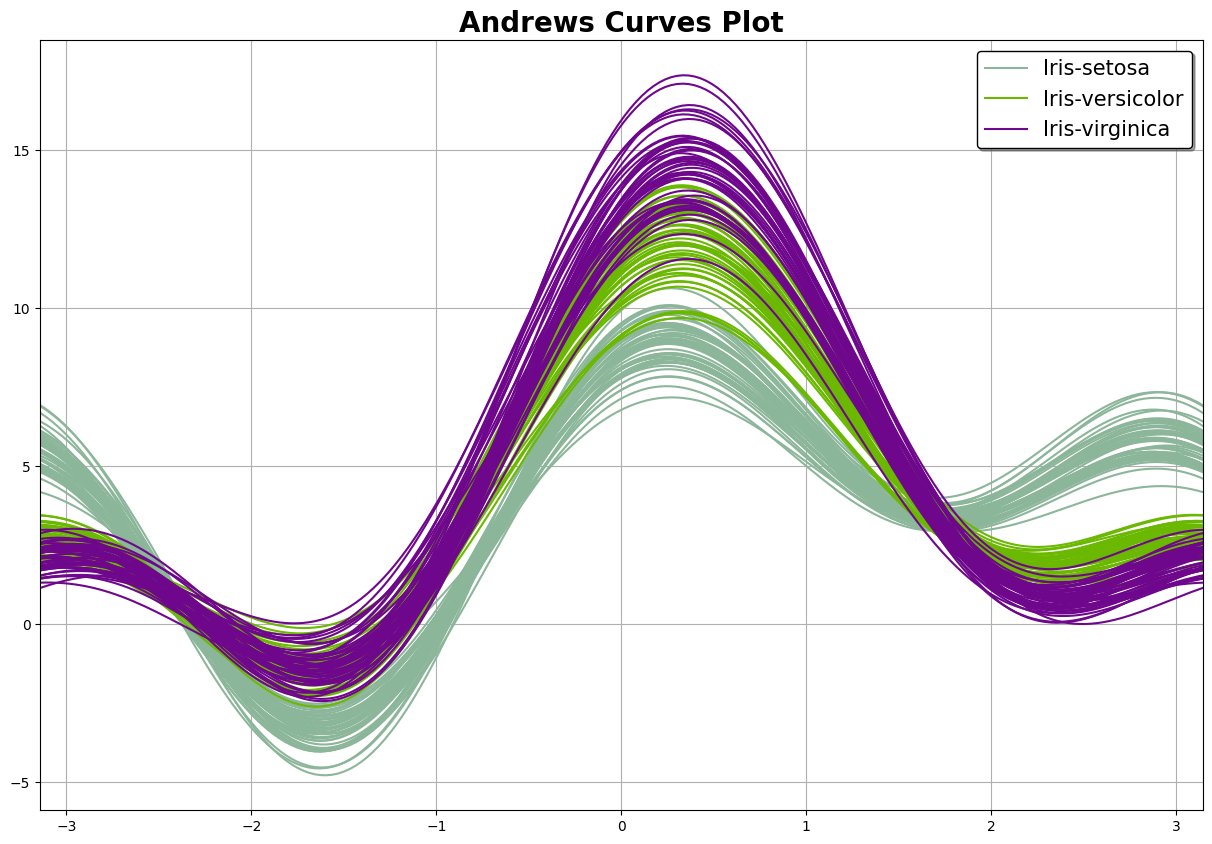

In [ ]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

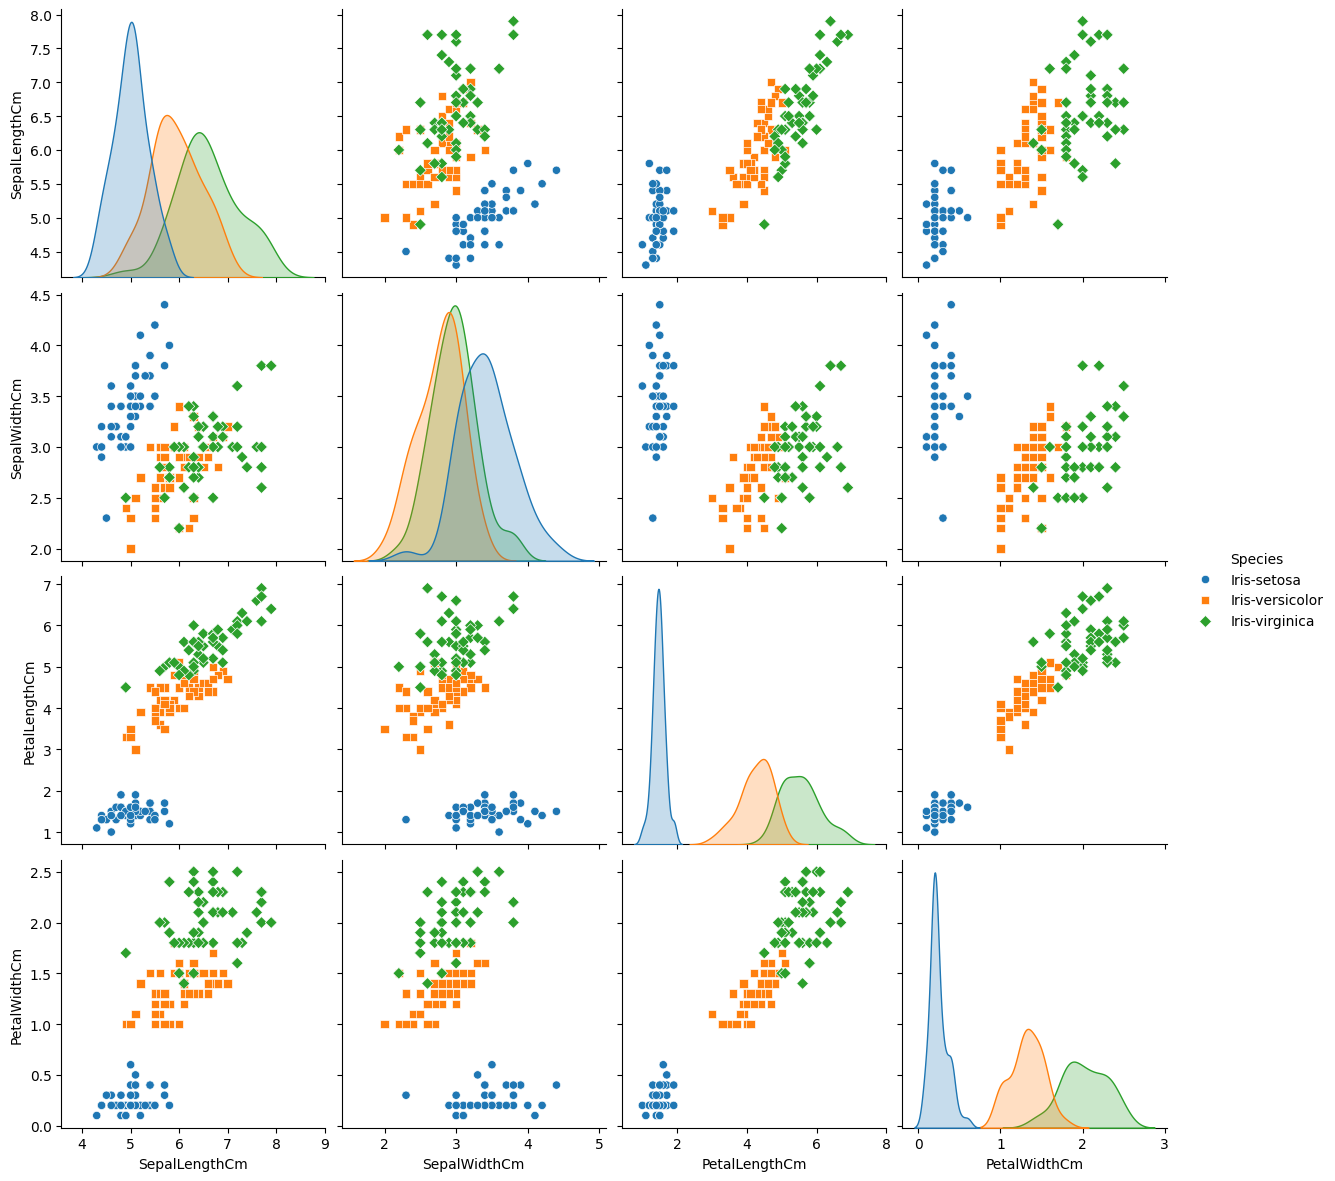

In [ ]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)

# Create a dictionary to map species to numerical values for color coding
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Map the species names in 'y' to numerical values using the dictionary
y_numeric = np.array([species_mapping[species] for species in y])


ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_numeric, # Use the mapped numerical values for color
           cmap=plt.cm.Set1, edgecolor='k', s=X[:, 3] * 50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y_numeric == label, 0].mean(),  # Use y_numeric for indexing
              X[y_numeric == label, 1].mean(),
              X[y_numeric == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'), size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
# Replace ax.w_xaxis with ax.xaxis
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
# Replace ax.w_yaxis with ax.yaxis
ax.yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
# Replace ax.w_zaxis with ax.zaxis
ax.zaxis.set_ticklabels([])

plt.show()

<Figure size 2000x1500 with 0 Axes>